In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Aim:

Given Dataset (X, y), learn a function `f` that maps `X` to `y`, i.e. `y = f(X)`.

We will consider two cases:
- Parametric: `f` is a function of a fixed number of parameters, e.g. `f(x) = ax + b`
- Non-parametric: `f` is a function of number of parameters that grows with the size of the dataset.


In [9]:
# Dataset for classification. Trivial dataset with 1 point in each class.

X = np.array([[0, 0], [1, 1]])
y = np.array([0, 1])

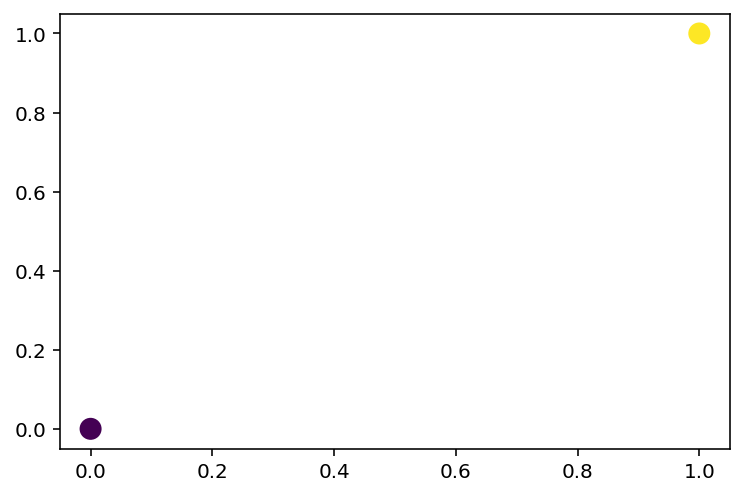

In [11]:
# Plot the dataset

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='viridis')

In [12]:
# Plot the decision boundary of a logistic regression classifier, KNN classifier, decision tree classifier, and a neural network classifier.

def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='viridis')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    

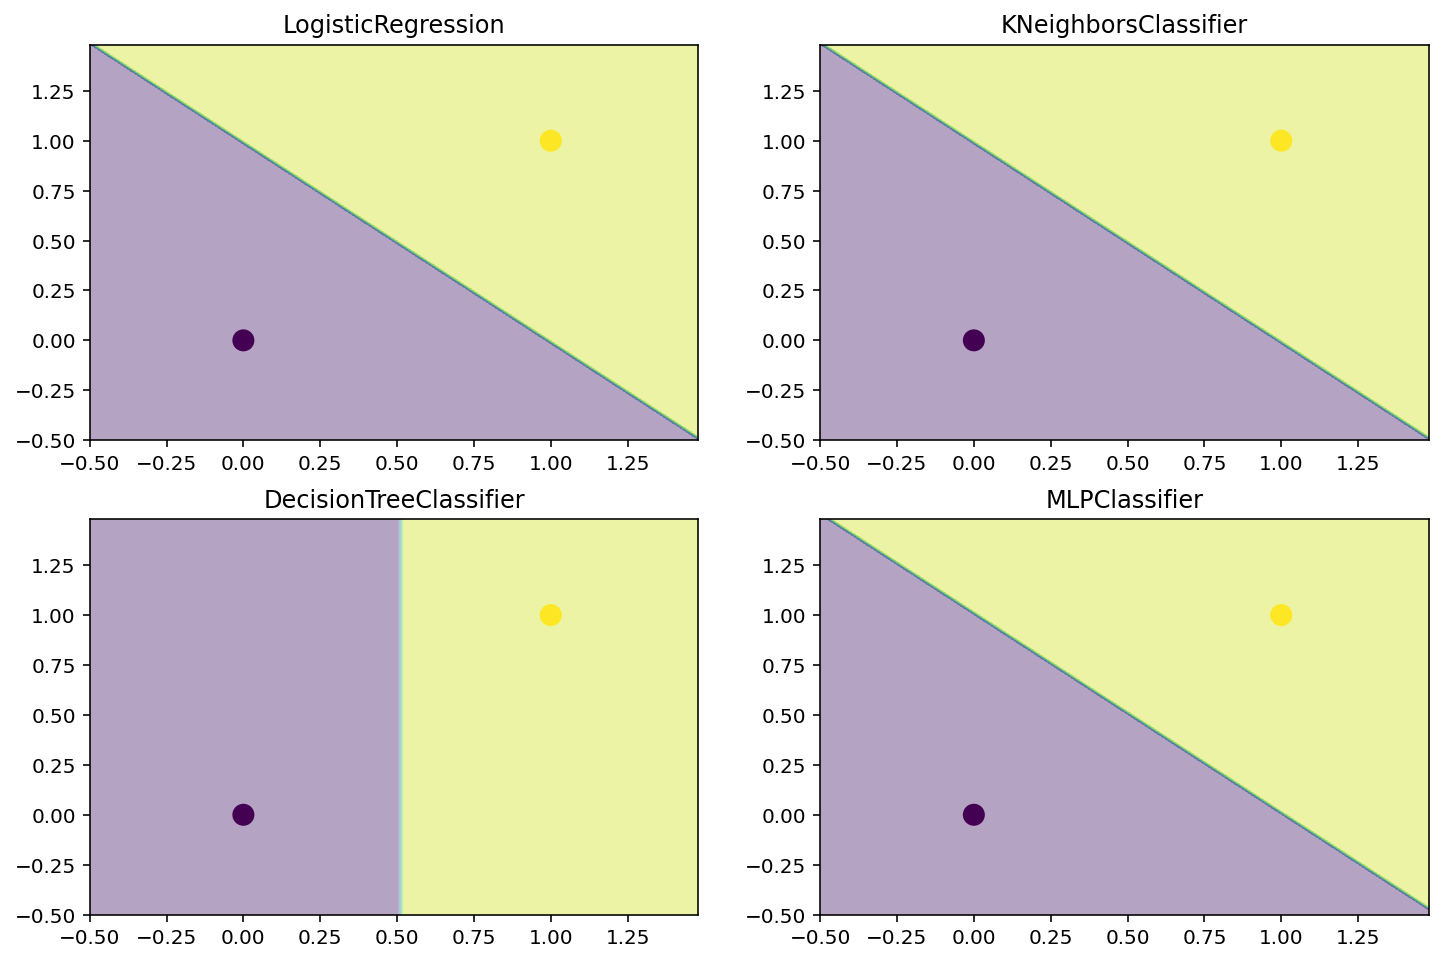

In [13]:
# Instantiate the models

lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=1)
dt = DecisionTreeClassifier()
nn = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', max_iter=10000)

# Plot the decision boundaries

plt.figure(figsize=(12, 8))

for i, model in enumerate([lr, knn, dt, nn]):
    plt.subplot(2, 2, i + 1)
    model.fit(X, y)
    plot_decision_boundary(model, X, y)
    plt.title(model.__class__.__name__)

## Learnt functions

### Logistic Regression

```python
logits = X @ w + b
prob = sigmoid(logits)
y_pred = prob > 0.5
```

### Decision Tree


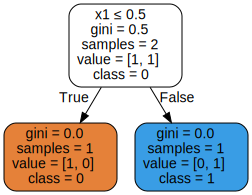

In [18]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt, out_file=None, feature_names=['x1', 'x2'], class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

### MLP

```
logits = nn.predict(X)
probs = sigmoid(logits)
y_pred = probs>0.5
```

### KNN

```
if X1 < 0.5 and X2 < 0.5:
    y = 0
elif X1 < 0.5 and X2 >= 0.5:
    ...
```

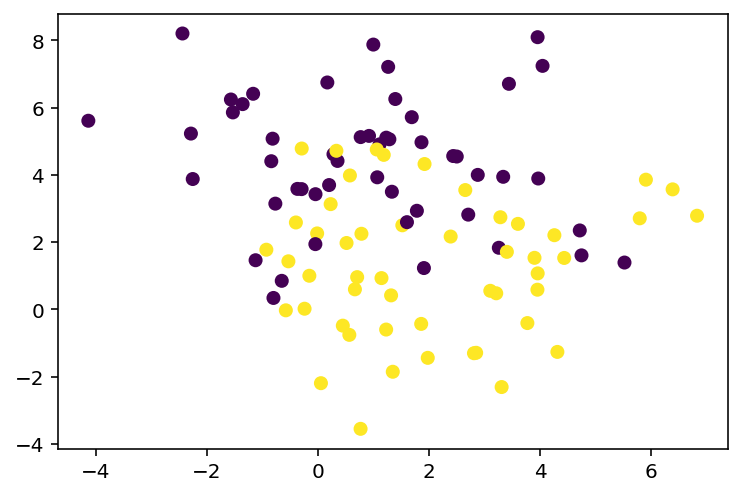

In [25]:
# Sophisticated dataset with 2 classes

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0, cluster_std=2)

# Plot the dataset

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

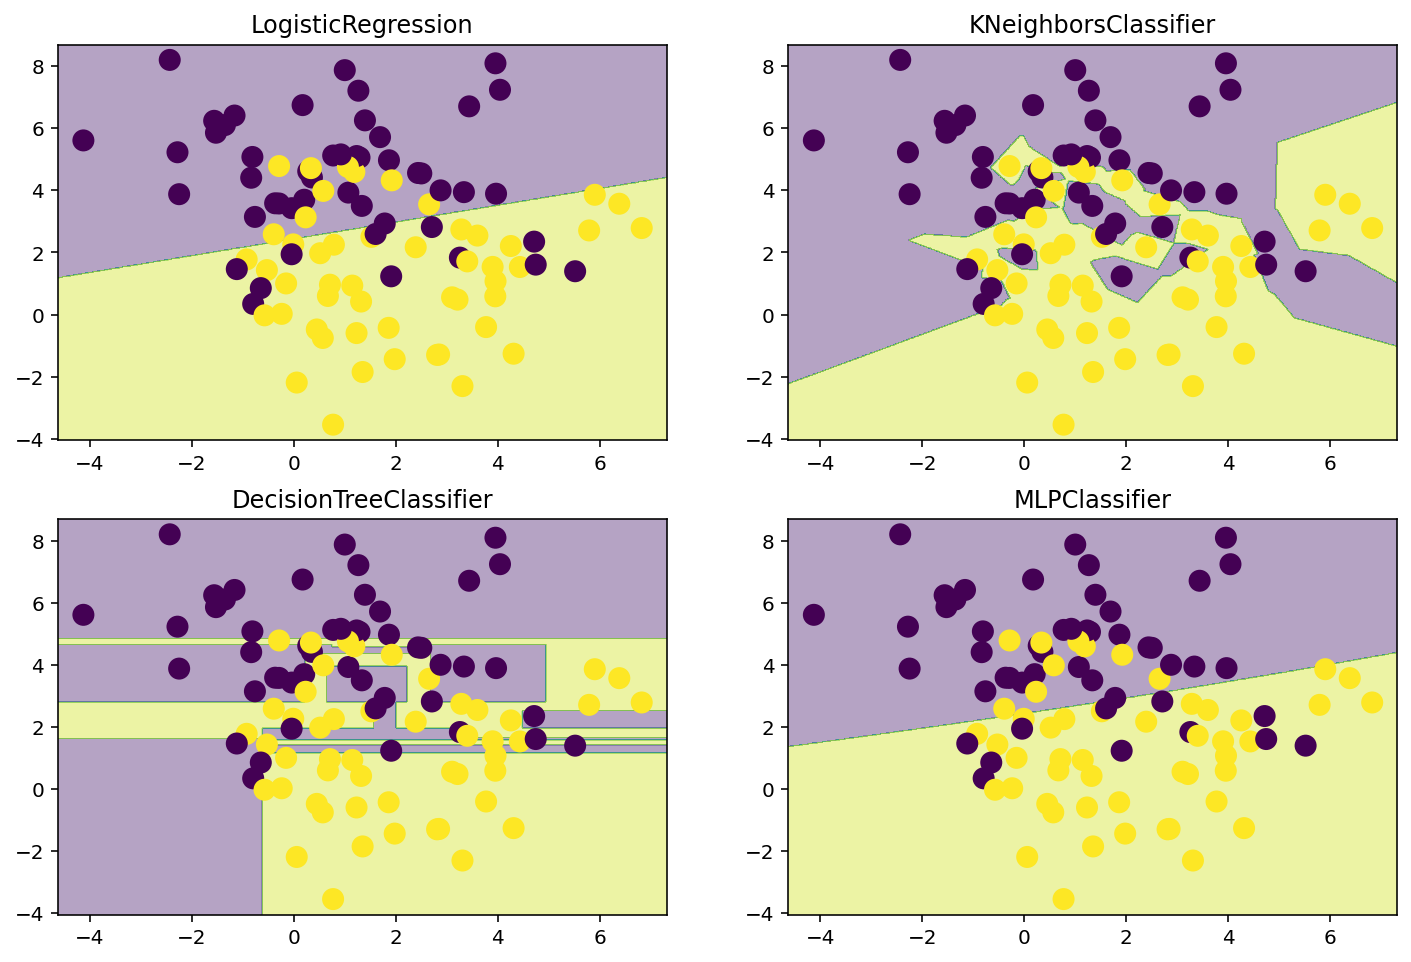

In [26]:
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=1)
dt = DecisionTreeClassifier()
nn = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', max_iter=10000)

# Plot the decision boundaries

plt.figure(figsize=(12, 8))

for i, model in enumerate([lr, knn, dt, nn]):
    plt.subplot(2, 2, i + 1)
    model.fit(X, y)
    plot_decision_boundary(model, X, y)
    plt.title(model.__class__.__name__)

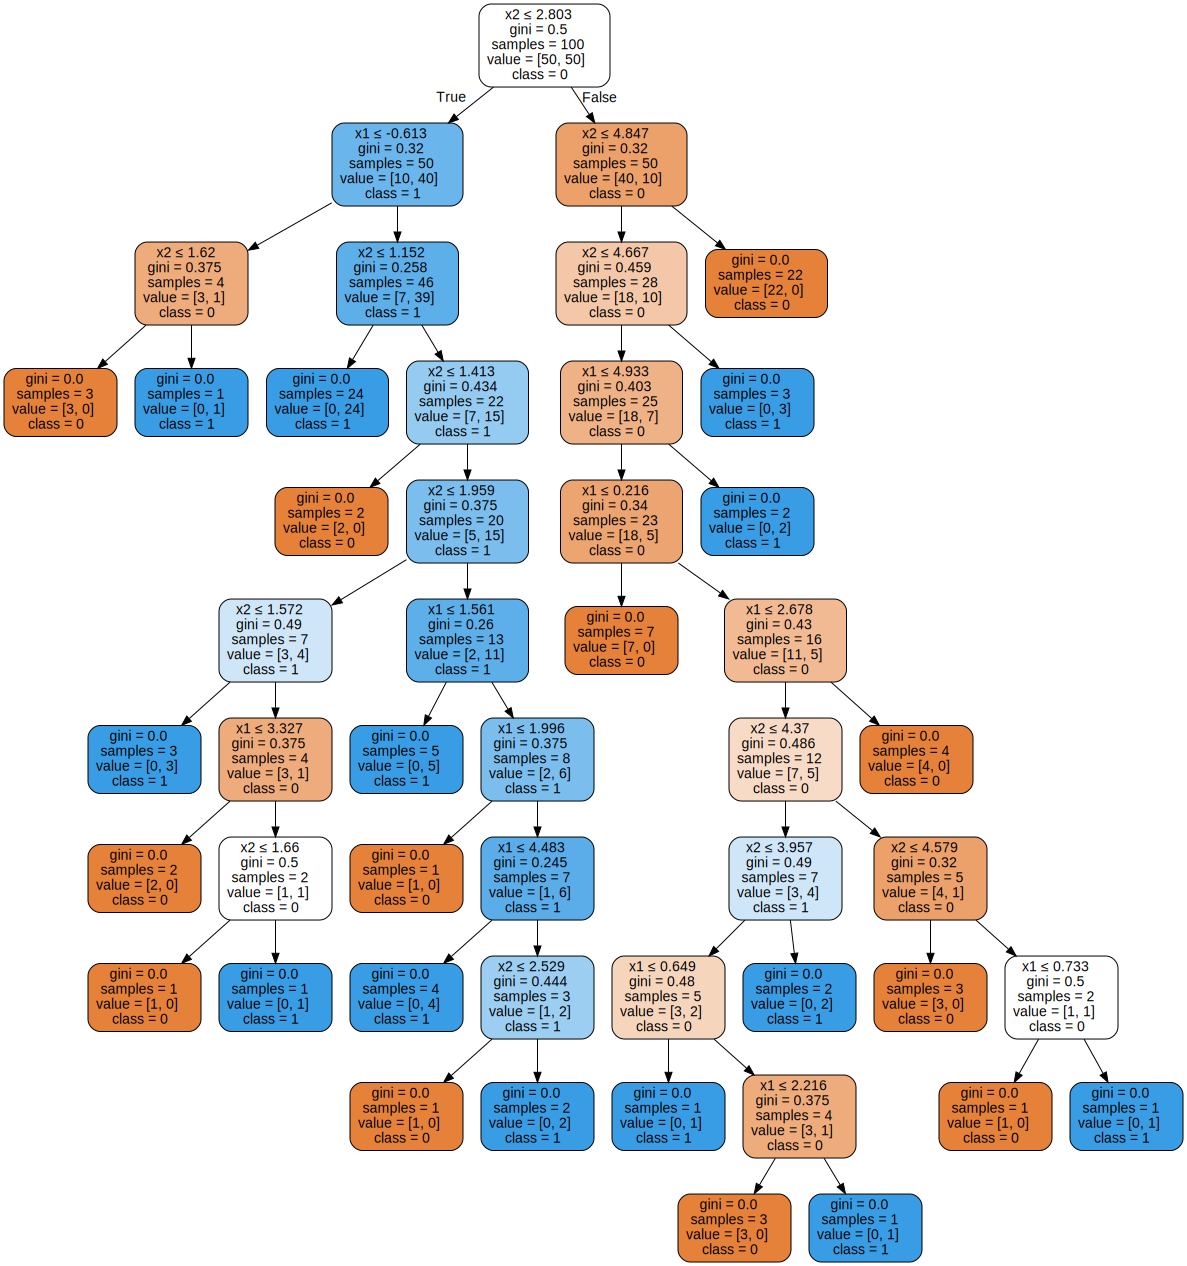

In [27]:
dot_data = export_graphviz(dt, out_file=None, feature_names=['x1', 'x2'], class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [30]:
dt.get_depth(), dt.get_n_leaves()

(10, 25)

In [28]:
lr.coef_

array([[ 0.19758375, -0.7298237 ]])

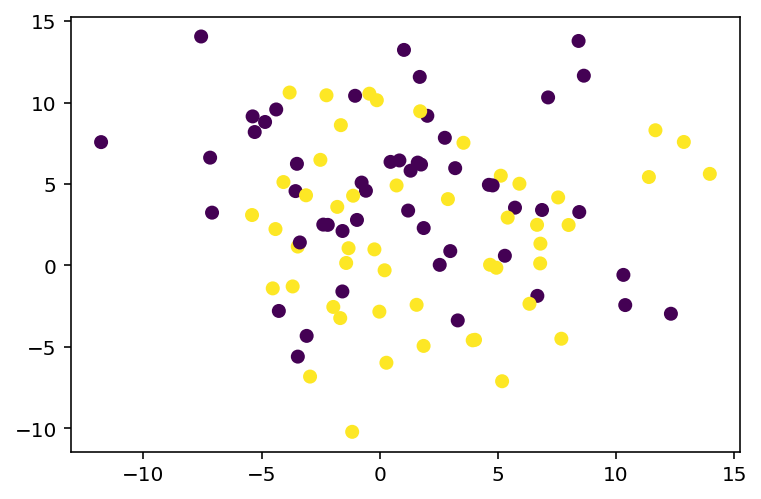

In [31]:
# Now, more noise

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0, cluster_std=5)

# Plot the dataset

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

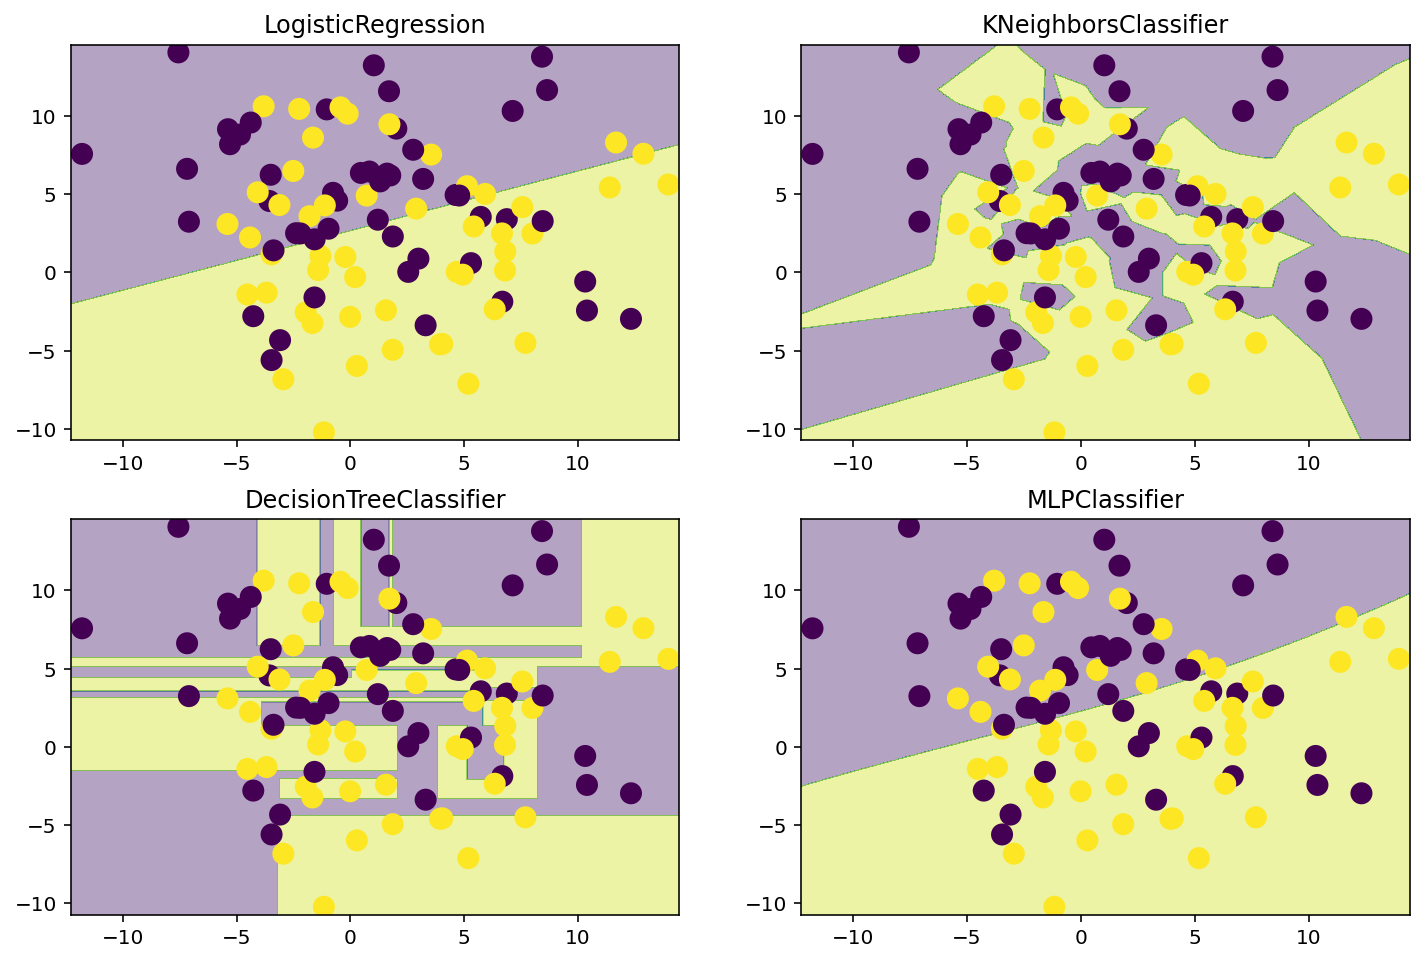

In [32]:
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=1)
dt = DecisionTreeClassifier()
nn = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', max_iter=10000)

# Plot the decision boundaries

plt.figure(figsize=(12, 8))

for i, model in enumerate([lr, knn, dt, nn]):
    plt.subplot(2, 2, i + 1)
    model.fit(X, y)
    plot_decision_boundary(model, X, y)
    plt.title(model.__class__.__name__)

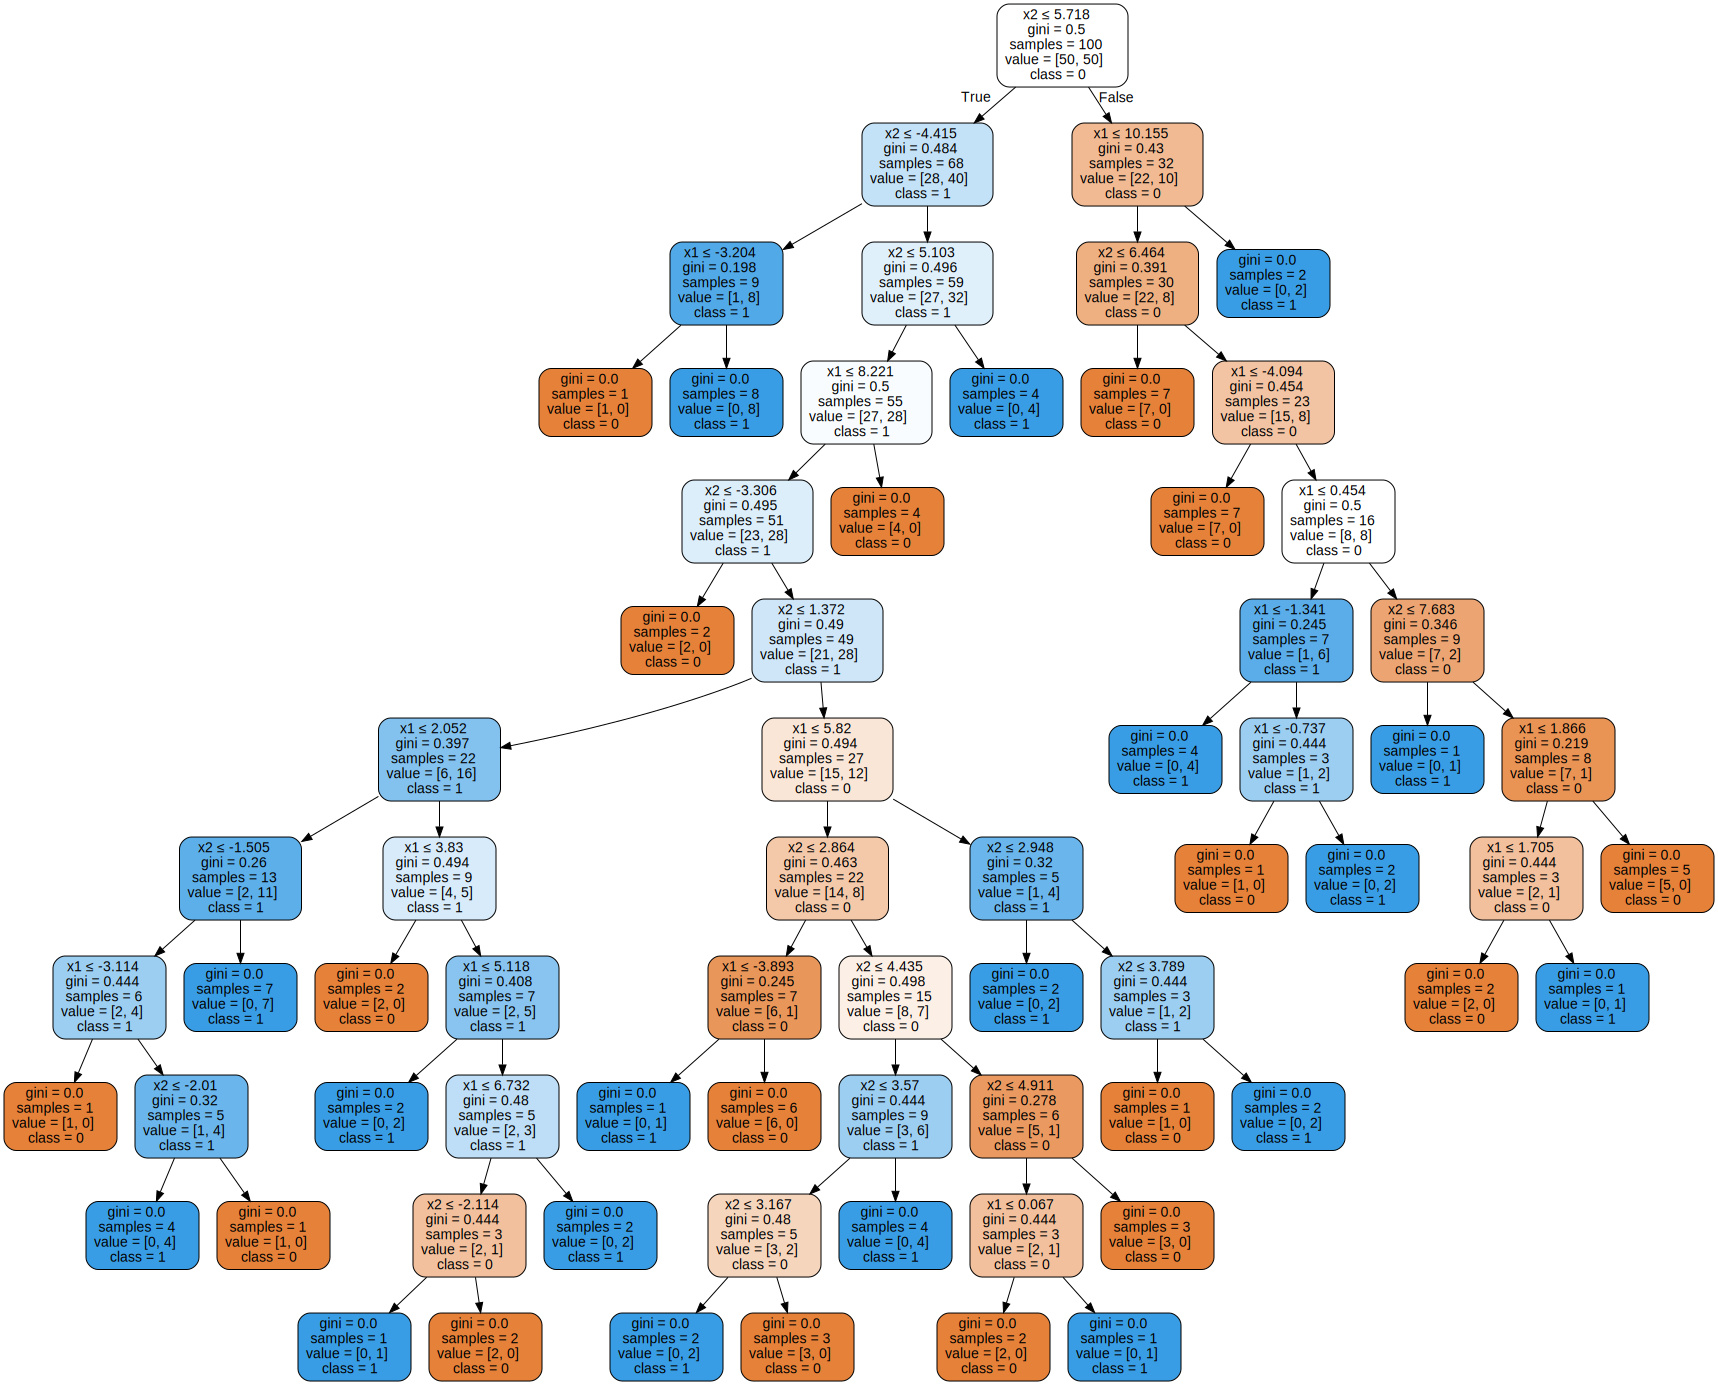

In [33]:
dot_data = export_graphviz(dt, out_file=None, feature_names=['x1', 'x2'], class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [36]:
dt.get_depth(), dt.get_n_leaves()

(11, 35)

In [37]:
lr.coef_

array([[ 0.03933004, -0.10323595]])